
### 1. **Neighborhood Cohesion**

- **Dependent Variable**:  
  `GEO_robinson_neighbourhood_cohesion_scale_belong` (*"I feel like I belong to this neighborhood"*).

- **Independent Variables**:  
  - `GEO_robinson_neighbourhood_cohesion_scale_sense_of_community` (*"Living in this neighborhood gives me a sense of community"*).  
  - `GEO_robinson_neighbourhood_cohesion_scale_stop_and_talk` (*"I regularly stop and talk with people in my neighborhood"*).  
  - `GEO_robinson_neighbourhood_cohesion_scale_attracted` (*"I am attracted to living in this neighborhood"*).  
  - `GEO_canadian_housing_satisfaction_scale_recreation` (*"I am satisfied with the recreation options available in this neighborhood"*).  
  - `GEO_canadian_housing_satisfaction_scale_programs` (*"I am satisfied with the programs offered in this neighborhood"*).  

- **Why it Matters**:  
This analysis explores how features of an active neighborhood (community interactions, attractiveness, and amenities) contribute to an individual's sense of belonging. Belonging is a cornerstone of forming connections, making this analysis critical for understanding how active neighborhoods promote personal relationships.

---

### 2. **Psychological Perceptions**

- **Dependent Variable**:  
  `PSYCH_ubc_state_social_connection_scale_can_connect_with_others` (*"I feel like I am able to connect with other people"*).

- **Independent Variables**:  
  - `PSYCH_relational_needs_satisfaction_scale_5pt_similar_life_experience` (*"I have people in my social circle who share similar life experiences with me"*).  
  - `PSYCH_ubc_state_social_connection_scale_sense_of_belonging` (*"I have a sense of belonging"*).  
  - `PSYCH_ubc_state_social_connection_scale_see_people_friendly_approachable` (*"I see people as friendly and approachable"*).

- **Why it Matters**:  
Active neighborhoods foster a sense of belonging and encourage perceptions of friendliness and approachability. This analysis helps demonstrate the psychological pathways through which active neighborhoods contribute to individuals feeling connected to others, a vital component of our hypothesis.

---

### 3. **Social Barriers**

- **Dependent Variable**:  
  `CONNECTION_social_barriers_no_people` (*"I don’t have people to hang out with"*).

- **Independent Variables**:  
  - `CONNECTION_social_barriers_dont_know_where` (*"I don’t know where to meet people"*).  
  - `CONNECTION_social_barriers_nothing_to_do` (*"There’s nothing to do"*).  
  - **Interaction Term**: *"I don’t know where to meet people" × "There’s nothing to do."*

- **Why it Matters**:  
Social barriers inhibit the ability to form connections. By analyzing how these barriers interact, this analysis highlights the obstacles preventing people from fully participating in an active neighborhood. Addressing these barriers is essential to fostering connections in the community.  

---

### Hypothesis Connection:
An active neighborhood, defined by engaged community members and accessible amenities, promotes individual and group interactions that foster a sense of belonging, perceptions of friendliness, and opportunities for social connection. By examining neighborhood cohesion, psychological perceptions, and barriers, we demonstrate how active neighborhoods directly and indirectly support an individual’s ability to form connections.

In [20]:
import pandas as pd

# Load dataset
csv_url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
df = pd.read_csv(csv_url, low_memory=False)
print("Dataset loaded successfully.")


Dataset loaded successfully.


# Neighborhood Cohesion

For the neighborhood cohesion category, we examined how various factors influence a person’s sense of belonging within their neighborhood. The dependent variable was GEO_robinson_neighbourhood_cohesion_scale_belong, and the independent variables included:

GEO_robinson_neighbourhood_cohesion_scale_sense_of_community \
GEO_robinson_neighbourhood_cohesion_scale_stop_and_talk \
GEO_robinson_neighbourhood_cohesion_scale_attracted \
GEO_canadian_housing_satisfaction_scale_recreation \
GEO_canadian_housing_satisfaction_scale_programs

In [21]:
# Corrected list of variables
dependent_var_geo = "GEO_robinson_neighbourhood_cohesion_scale_belong"
independent_vars_geo = [
    "GEO_robinson_neighbourhood_cohesion_scale_sense_of_community",
    "GEO_robinson_neighbourhood_cohesion_scale_stop_and_talk",
    "GEO_robinson_neighbourhood_cohesion_scale_attracted",
    "GEO_canadian_housing_satisfaction_scale_recreation",
    "GEO_canadian_housing_satisfaction_scale_programs"
]


In [22]:
# Clean and encode data
def prepare_geo_data(df):
    # Combine all variables
    all_vars_geo = [dependent_var_geo] + independent_vars_geo

    # Drop invalid and missing responses
    for var in all_vars_geo:
        if var in df.columns:
            df = df[~df[var].isin(["Presented but no response"])]
            df = df.dropna(subset=[var])

    # Encoding responses
    encoding_geo = {
        "Strongly agree": 5, "Agree": 4, "Slightly agree": 3,
        "Neither agree nor disagree": 2, "Slightly disagree": 1,
        "Disagree": 0, "Strongly disagree": -1,
        "Very satisfied": 5, "Satisfied": 4,
        "Neither satisfied or dissatisfied": 3, "Dissatisfied": 2,
        "Very dissatisfied": 1
    }
    for var in all_vars_geo:
        if var in df.columns:
            df[var] = df[var].map(encoding_geo)

    return df[all_vars_geo]

# Prepare the Geo_Robinson dataset
df_geo = prepare_geo_data(df.copy())
print(f"Number of respondents for Geo_Robinson MLR: {df_geo.shape[0]}")
print(df_geo.head())


Number of respondents for Geo_Robinson MLR: 1867
    GEO_robinson_neighbourhood_cohesion_scale_belong  \
1                                                  5   
2                                                  4   
4                                                  5   
11                                                 4   
23                                                 5   

    GEO_robinson_neighbourhood_cohesion_scale_sense_of_community  \
1                                                   4              
2                                                   4              
4                                                   5              
11                                                  4              
23                                                  4              

    GEO_robinson_neighbourhood_cohesion_scale_stop_and_talk  \
1                                                   4         
2                                                   0         
4               

In [23]:
import statsmodels.api as sm

# Define X and y
X_geo = df_geo[independent_vars_geo]
y_geo = df_geo[dependent_var_geo]
X_geo = sm.add_constant(X_geo)

# Fit the MLR model
model_geo = sm.OLS(y_geo, X_geo).fit()

# Display the summary
print(model_geo.summary())


                                           OLS Regression Results                                           
Dep. Variable:     GEO_robinson_neighbourhood_cohesion_scale_belong   R-squared:                       0.394
Model:                                                          OLS   Adj. R-squared:                  0.393
Method:                                               Least Squares   F-statistic:                     242.3
Date:                                              Sun, 01 Dec 2024   Prob (F-statistic):          1.23e-199
Time:                                                      05:54:51   Log-Likelihood:                -3426.7
No. Observations:                                              1867   AIC:                             6865.
Df Residuals:                                                  1861   BIC:                             6899.
Df Model:                                                         5                                         
Covariance Type:   

In [24]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring Individual Effects with SLR
### To better understand how individual factors influence a person’s sense of belonging, we first performed Simple Linear Regression (SLR) on three of the independent variables:

### 1. Sense of Community:
We visualized the relationship between GEO_robinson_neighbourhood_cohesion_scale_sense_of_community and sense of belonging using a bubble plot. The size of the bubbles represented the count of responses, and a regression line highlighted the linear relationship.

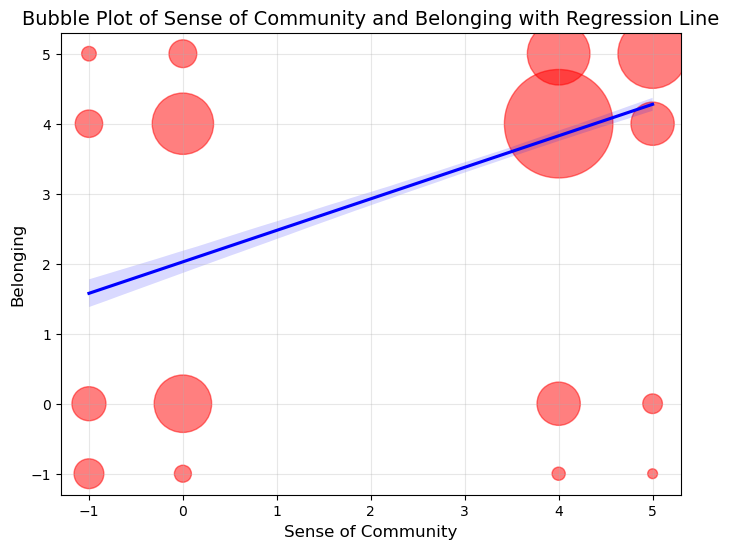

In [25]:
# Group the data to calculate counts
counts = (
    df_geo.groupby(["GEO_robinson_neighbourhood_cohesion_scale_sense_of_community", 
                    "GEO_robinson_neighbourhood_cohesion_scale_belong"])
    .size()
    .reset_index(name="count")
)

# Adding regression line to the bubble plot
plt.figure(figsize=(8, 6))

# Bubble plot
plt.scatter(
    counts["GEO_robinson_neighbourhood_cohesion_scale_sense_of_community"],
    counts["GEO_robinson_neighbourhood_cohesion_scale_belong"],
    s=counts["count"] * 10, alpha=0.5, color='red'
)

# Regression line
sns.regplot(
    x=df_geo["GEO_robinson_neighbourhood_cohesion_scale_sense_of_community"],
    y=df_geo["GEO_robinson_neighbourhood_cohesion_scale_belong"],
    scatter=False, line_kws={"color": "blue"}
)

plt.title("Bubble Plot of Sense of Community and Belonging with Regression Line", fontsize=14)
plt.xlabel("Sense of Community", fontsize=12)
plt.ylabel("Belonging", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


The bubble plot shows a clear positive relationship between a sense of community and feelings of belonging, as higher community ratings align with stronger belonging scores. Larger bubbles near the higher end of the community scale indicate more respondents with strong community ties and belonging. Smaller bubbles at the lower end suggest fewer individuals who feel disconnected from their community.

### 2. Attraction to Neighborhood:
A violin plot was used to display how levels of attraction (GEO_robinson_neighbourhood_cohesion_scale_attracted) were associated with belonging. This plot showcased the spread and density of responses, offering unique insights into individual variability.

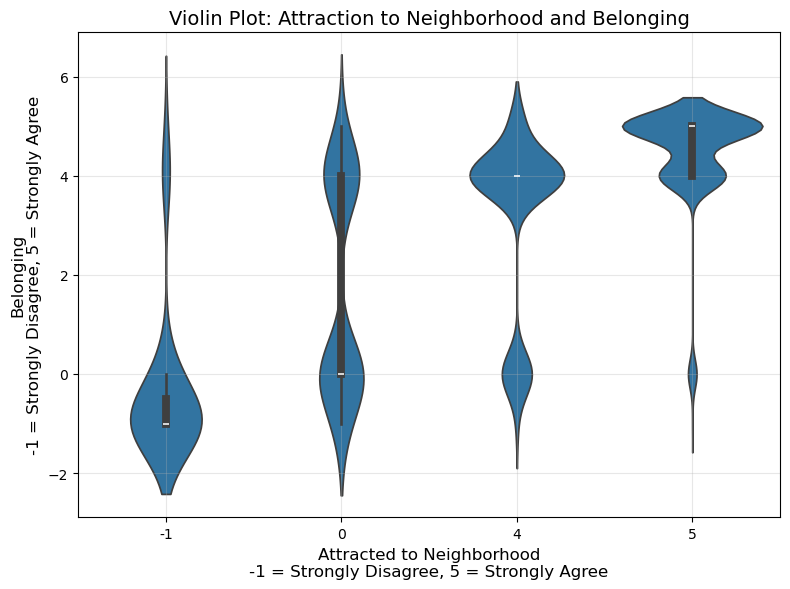

In [26]:
# Violin Plot showcasing the relationship between Attraction and Belonging
plt.figure(figsize=(8, 6))

# Create a violin plot without specifying palette
sns.violinplot(
    x="GEO_robinson_neighbourhood_cohesion_scale_attracted",
    y="GEO_robinson_neighbourhood_cohesion_scale_belong",
    data=df_geo
)

# Add titles and axis labels
plt.title("Violin Plot: Attraction to Neighborhood and Belonging", fontsize=14)
plt.xlabel("Attracted to Neighborhood\n-1 = Strongly Disagree, 5 = Strongly Agree", fontsize=12)
plt.ylabel("Belonging\n-1 = Strongly Disagree, 5 = Strongly Agree", fontsize=12)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




The violin plot illustrates the distribution of belonging scores across levels of neighborhood attraction. Respondents who strongly agree that they are attracted to their neighborhood show higher and more consistent belonging scores, while those with lower attraction levels have more varied and lower belonging. This suggests a positive relationship between neighborhood attraction and feelings of belonging.

### 3. Recreation Satisfaction:
To analyze the impact of GEO_canadian_housing_satisfaction_scale_recreation on belonging, we created a heatmap. This inverted y-axis visualization illustrated the count of responses across satisfaction and belonging levels, making trends visually apparent.

In [27]:
import statsmodels.api as sm

# Define the independent and dependent variables for SLR
X_slr = df_geo["GEO_canadian_housing_satisfaction_scale_recreation"]
y_slr = df_geo["GEO_robinson_neighbourhood_cohesion_scale_belong"]

# Add a constant to the independent variable for the intercept
X_slr = sm.add_constant(X_slr)

# Fit the Simple Linear Regression model
slr_model_geo = sm.OLS(y_slr, X_slr).fit()

# Print the regression summary
print(slr_model_geo.summary())



                                           OLS Regression Results                                           
Dep. Variable:     GEO_robinson_neighbourhood_cohesion_scale_belong   R-squared:                       0.109
Model:                                                          OLS   Adj. R-squared:                  0.108
Method:                                               Least Squares   F-statistic:                     227.7
Date:                                              Sun, 01 Dec 2024   Prob (F-statistic):           1.27e-48
Time:                                                      05:54:53   Log-Likelihood:                -3787.3
No. Observations:                                              1867   AIC:                             7579.
Df Residuals:                                                  1865   BIC:                             7590.
Df Model:                                                         1                                         
Covariance Type:   

In [28]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot with jittered data points
plt.figure(figsize=(10, 6))

# Scatter plot with jitter
sns.scatterplot(
    x=jitter_x,
    y=jitter_y,
    alpha=0.5,
    color="blue",
    label="Jittered Data Points"
)

# Regression line
plt.plot(
    sorted(x_vals),
    sorted(y_vals),
    color="red",
    label="Regression Line: y = 1.01 + 0.62x",
    alpha=0.8
)

# Adjust y-axis ticks to reflect only unique response options
plt.yticks([-1, 0, 4, 5], labels=["Strongly Disagree", "Disagree", "Agree", "Strongly Agree"])

# Add titles and labels
plt.title("SLR: Recreation Satisfaction vs. Sense of Belonging (With Jitter)", fontsize=14)
plt.xlabel("Recreation Satisfaction\n1 = Very Dissatisfied, 5 = Very Satisfied", fontsize=12)
plt.ylabel("Sense of Belonging", fontsize=12)

# Add legend and grid
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Display the plot
plt.show()


NameError: name 'jitter_x' is not defined

<Figure size 1000x600 with 0 Axes>

The plot examines the relationship between Recreation Satisfaction (independent variable) and Sense of Belonging (dependent variable) with a jittered scatter plot and a regression line. A positive linear trend is evident, indicated by the equation 
y=1.01+0.62x, suggesting that higher satisfaction with recreational facilities correlates with a stronger sense of belonging. The clustering of data points at specific satisfaction levels (e.g., 3 and 4) reflects common respondent scores.

In [29]:
# Map numeric values to descriptive labels
belonging_labels = {
    -1: "Strongly Disagree",
     0: "Disagree",
     4: "Agree",
     5: "Strongly Agree"
}

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_matrix.reindex([-1, 0, 4, 5])[::-1],  # Reindex rows and invert y-axis
    annot=True, fmt="g", cmap="Greens",
    cbar=False  # Remove the color bar
)

# Update y-axis with descriptive labels
plt.yticks(ticks=[0, 1, 2, 3], labels=[belonging_labels[val] for val in [-1, 0, 4, 5]], rotation=0)

# Add titles and labels
plt.title("Heatmap: Recreation Satisfaction vs. Sense of Belonging", fontsize=14)
plt.xlabel("Recreation Satisfaction\n1 = Very Dissatisfied, 5 = Very Satisfied", fontsize=12)
plt.ylabel("Sense of Belonging", fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the heatmap
plt.show()





NameError: name 'heatmap_matrix' is not defined

<Figure size 1000x600 with 0 Axes>

And just for fun, I turned the graph into a heatmap to visualize it better.

### 4. MLR

After exploring individual effects through SLR, we performed Multiple Linear Regression (MLR) using all five predictors to evaluate their combined impact on sense of belonging. This analysis allowed us to account for the influence of all variables simultaneously, providing a more comprehensive understanding of how factors such as sense of community, attraction to the neighborhood, recreation satisfaction, programs satisfaction, and frequency of stopping and talking relate to the feeling of belonging in a neighborhood.

The resulting MLR graph visualized the relationship between each independent variable and the predicted sense of belonging, illustrating their respective contributions to the overall model. By comparing these lines and scatter points, we gained deeper insights into which predictors had stronger linear relationships with the dependent variable.

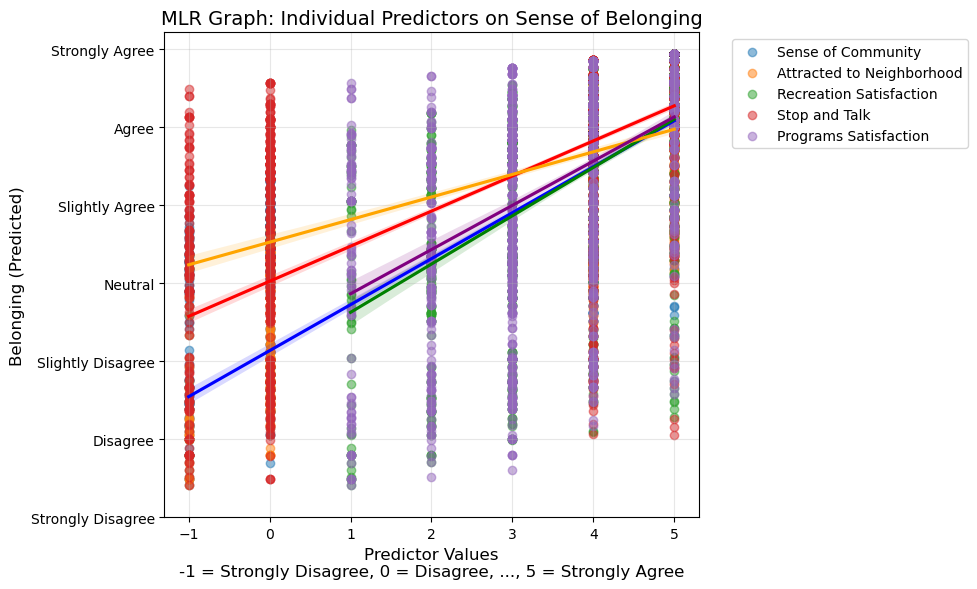

In [30]:
plt.figure(figsize=(10, 6))

# Plot each variable's relationship with the predicted values
sns.regplot(
    x=df_geo["GEO_robinson_neighbourhood_cohesion_scale_sense_of_community"],
    y=model_geo.predict(),
    label="Sense of Community",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"}
)
sns.regplot(
    x=df_geo["GEO_robinson_neighbourhood_cohesion_scale_attracted"],
    y=model_geo.predict(),
    label="Attracted to Neighborhood",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "blue"}
)
sns.regplot(
    x=df_geo["GEO_canadian_housing_satisfaction_scale_recreation"],
    y=model_geo.predict(),
    label="Recreation Satisfaction",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "green"}
)
sns.regplot(
    x=df_geo["GEO_robinson_neighbourhood_cohesion_scale_stop_and_talk"],
    y=model_geo.predict(),
    label="Stop and Talk",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "orange"}
)
sns.regplot(
    x=df_geo["GEO_canadian_housing_satisfaction_scale_programs"],
    y=model_geo.predict(),
    label="Programs Satisfaction",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "purple"}
)

# Replace y-axis values with words
plt.yticks(
    [-1, 0, 1, 2, 3, 4, 5],
    [
        "Strongly Disagree",
        "Disagree",
        "Slightly Disagree",
        "Neutral",
        "Slightly Agree",
        "Agree",
        "Strongly Agree"
    ]
)

# Add titles and axis labels
plt.title("MLR Graph: Individual Predictors on Sense of Belonging", fontsize=14)
plt.xlabel("Predictor Values\n-1 = Strongly Disagree, 0 = Disagree, ..., 5 = Strongly Agree", fontsize=12)
plt.ylabel("Belonging (Predicted)", fontsize=12)

# Adjust legend placement outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()



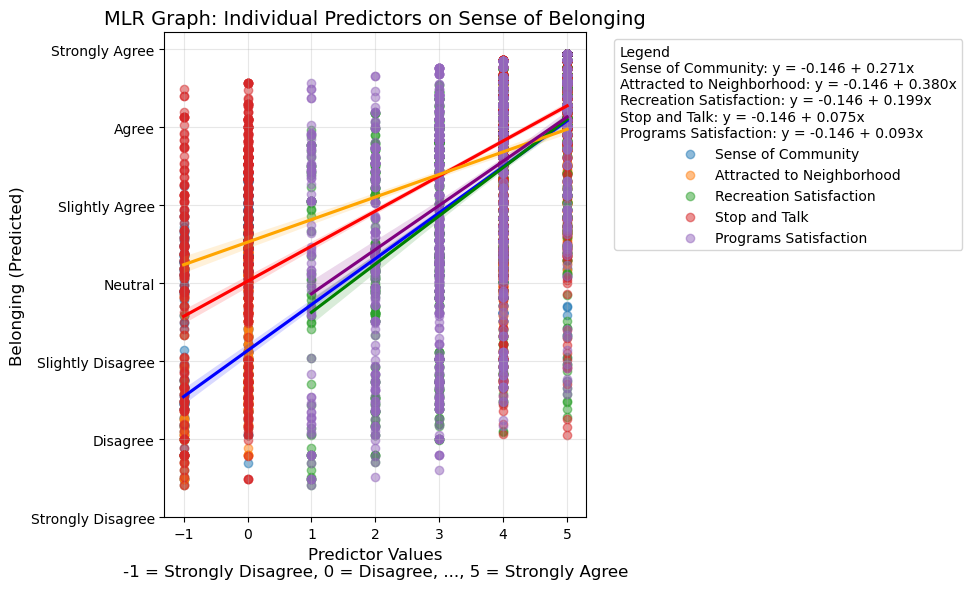

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each variable's relationship with the predicted values
sns.regplot(
    x=df_geo["GEO_robinson_neighbourhood_cohesion_scale_sense_of_community"],
    y=model_geo.predict(),
    label="Sense of Community",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"}
)
sns.regplot(
    x=df_geo["GEO_robinson_neighbourhood_cohesion_scale_attracted"],
    y=model_geo.predict(),
    label="Attracted to Neighborhood",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "blue"}
)
sns.regplot(
    x=df_geo["GEO_canadian_housing_satisfaction_scale_recreation"],
    y=model_geo.predict(),
    label="Recreation Satisfaction",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "green"}
)
sns.regplot(
    x=df_geo["GEO_robinson_neighbourhood_cohesion_scale_stop_and_talk"],
    y=model_geo.predict(),
    label="Stop and Talk",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "orange"}
)
sns.regplot(
    x=df_geo["GEO_canadian_housing_satisfaction_scale_programs"],
    y=model_geo.predict(),
    label="Programs Satisfaction",
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "purple"}
)

# Replace y-axis values with words
plt.yticks(
    [-1, 0, 1, 2, 3, 4, 5],
    [
        "Strongly Disagree",
        "Disagree",
        "Slightly Disagree",
        "Neutral",
        "Slightly Agree",
        "Agree",
        "Strongly Agree"
    ]
)

# Add regression line equations under the legend
line_equations = [
    "Sense of Community: y = -0.146 + 0.271x",
    "Attracted to Neighborhood: y = -0.146 + 0.380x",
    "Recreation Satisfaction: y = -0.146 + 0.199x",
    "Stop and Talk: y = -0.146 + 0.075x",
    "Programs Satisfaction: y = -0.146 + 0.093x"
]
legend_labels = ["Sense of Community", "Attracted to Neighborhood", "Recreation Satisfaction", "Stop and Talk", "Programs Satisfaction"]

# Add the legend box with equations
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=10,
    title="Legend\n" + "\n".join(line_equations)
)

# Add titles and axis labels
plt.title("MLR Graph: Individual Predictors on Sense of Belonging", fontsize=14)
plt.xlabel("Predictor Values\n-1 = Strongly Disagree, 0 = Disagree, ..., 5 = Strongly Agree", fontsize=12)
plt.ylabel("Belonging (Predicted)", fontsize=12)

plt.grid(alpha=0.3)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


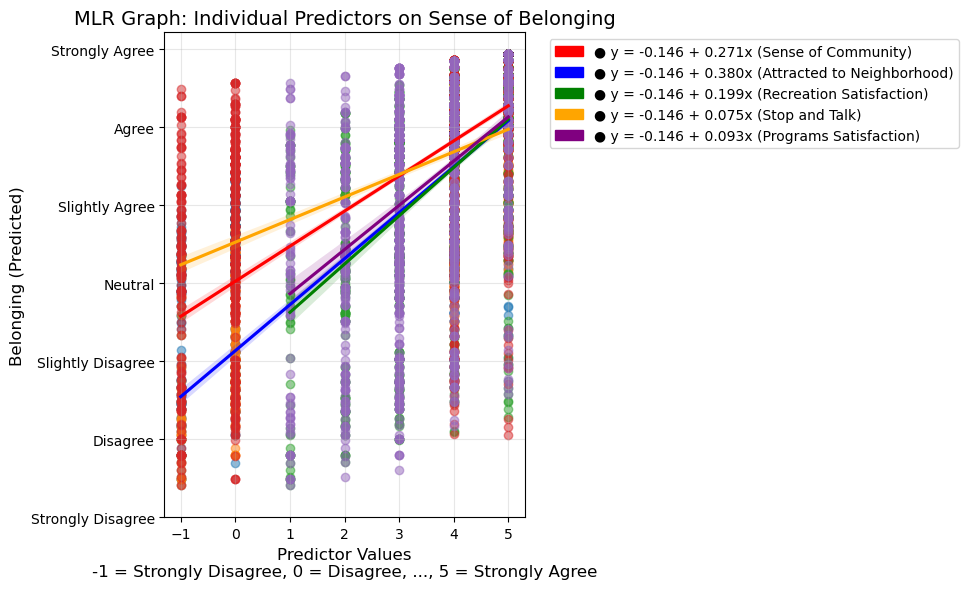

In [49]:
import matplotlib.patches as mpatches

# Define legend items with colored dots and regression equations
legend_items = [
    mpatches.Patch(color="red", label="● y = -0.146 + 0.271x (Sense of Community)"),
    mpatches.Patch(color="blue", label="● y = -0.146 + 0.380x (Attracted to Neighborhood)"),
    mpatches.Patch(color="green", label="● y = -0.146 + 0.199x (Recreation Satisfaction)"),
    mpatches.Patch(color="orange", label="● y = -0.146 + 0.075x (Stop and Talk)"),
    mpatches.Patch(color="purple", label="● y = -0.146 + 0.093x (Programs Satisfaction)")
]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each variable's relationship with the predicted values
sns.regplot(
    x=df_geo["GEO_robinson_neighbourhood_cohesion_scale_sense_of_community"],
    y=model_geo.predict(),
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"}
)
sns.regplot(
    x=df_geo["GEO_robinson_neighbourhood_cohesion_scale_attracted"],
    y=model_geo.predict(),
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "blue"}
)
sns.regplot(
    x=df_geo["GEO_canadian_housing_satisfaction_scale_recreation"],
    y=model_geo.predict(),
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "green"}
)
sns.regplot(
    x=df_geo["GEO_robinson_neighbourhood_cohesion_scale_stop_and_talk"],
    y=model_geo.predict(),
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "orange"}
)
sns.regplot(
    x=df_geo["GEO_canadian_housing_satisfaction_scale_programs"],
    y=model_geo.predict(),
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "purple"}
)

# Replace y-axis values with words
plt.yticks(
    [-1, 0, 1, 2, 3, 4, 5],
    [
        "Strongly Disagree",
        "Disagree",
        "Slightly Disagree",
        "Neutral",
        "Slightly Agree",
        "Agree",
        "Strongly Agree"
    ]
)

# Add titles and axis labels
plt.title("MLR Graph: Individual Predictors on Sense of Belonging", fontsize=14)
plt.xlabel("Predictor Values\n-1 = Strongly Disagree, 0 = Disagree, ..., 5 = Strongly Agree", fontsize=12)
plt.ylabel("Belonging (Predicted)", fontsize=12)

# Add the custom legend
plt.legend(handles=legend_items, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.grid(alpha=0.3)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


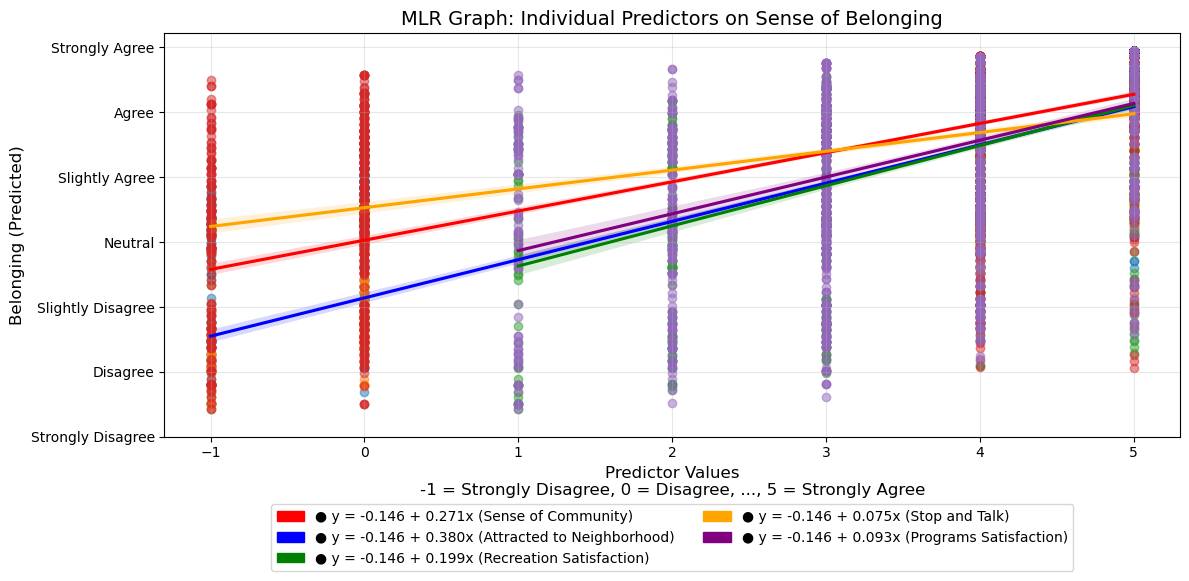

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Define legend items with colored dots and regression equations
legend_items = [
    mpatches.Patch(color="red", label="● y = -0.146 + 0.271x (Sense of Community)"),
    mpatches.Patch(color="blue", label="● y = -0.146 + 0.380x (Attracted to Neighborhood)"),
    mpatches.Patch(color="green", label="● y = -0.146 + 0.199x (Recreation Satisfaction)"),
    mpatches.Patch(color="orange", label="● y = -0.146 + 0.075x (Stop and Talk)"),
    mpatches.Patch(color="purple", label="● y = -0.146 + 0.093x (Programs Satisfaction)")
]

# Create the plot
plt.figure(figsize=(12, 6))  # Make the graph slightly wider

# Plot each variable's relationship with the predicted values
sns.regplot(
    x=df_geo["GEO_robinson_neighbourhood_cohesion_scale_sense_of_community"],
    y=model_geo.predict(),
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "red"}
)
sns.regplot(
    x=df_geo["GEO_robinson_neighbourhood_cohesion_scale_attracted"],
    y=model_geo.predict(),
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "blue"}
)
sns.regplot(
    x=df_geo["GEO_canadian_housing_satisfaction_scale_recreation"],
    y=model_geo.predict(),
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "green"}
)
sns.regplot(
    x=df_geo["GEO_robinson_neighbourhood_cohesion_scale_stop_and_talk"],
    y=model_geo.predict(),
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "orange"}
)
sns.regplot(
    x=df_geo["GEO_canadian_housing_satisfaction_scale_programs"],
    y=model_geo.predict(),
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "purple"}
)

# Replace y-axis values with words
plt.yticks(
    [-1, 0, 1, 2, 3, 4, 5],
    [
        "Strongly Disagree",
        "Disagree",
        "Slightly Disagree",
        "Neutral",
        "Slightly Agree",
        "Agree",
        "Strongly Agree"
    ]
)

# Add titles and axis labels
plt.title("MLR Graph: Individual Predictors on Sense of Belonging", fontsize=14)
plt.xlabel("Predictor Values\n-1 = Strongly Disagree, 0 = Disagree, ..., 5 = Strongly Agree", fontsize=12)
plt.ylabel("Belonging (Predicted)", fontsize=12)

# Add the custom legend below the graph
plt.legend(handles=legend_items, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=10)

plt.grid(alpha=0.3)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


# Psychological Perceptions

We aimed to explore how psychological factors influence social connection and belonging through a combination of SLR and MLR analyses.

In [31]:
#Reset Dataframe

import pandas as pd

# Load dataset
csv_url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
df = pd.read_csv(csv_url, low_memory=False)
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [32]:
# List of variables to inspect
selected_psych_vars = [
    "PSYCH_ubc_state_social_connection_scale_can_connect_with_others",
    "PSYCH_ubc_state_social_connection_scale_sense_of_belonging",
    "PSYCH_ubc_state_social_connection_scale_see_people_friendly_approachable",
    "PSYCH_relational_needs_satisfaction_scale_5pt_similar_life_experience"
]

# Inspect unique responses for each variable using df
unique_responses = {col: df[col].unique() for col in selected_psych_vars}
print("Unique Responses for Each Variable:")
for var, responses in unique_responses.items():
    print(f"{var}: {responses}")


Unique Responses for Each Variable:
PSYCH_ubc_state_social_connection_scale_can_connect_with_others: [nan 'Strongly agree' 'Agree' 'Slightly agree'
 'Neither agree nor disagree' 'Strongly disagree' 'Slightly disagree'
 'Disagree']
PSYCH_ubc_state_social_connection_scale_sense_of_belonging: [nan 'Strongly agree' 'Slightly agree' 'Neither agree nor disagree'
 'Strongly disagree' 'Agree' 'Slightly disagree' 'Disagree']
PSYCH_ubc_state_social_connection_scale_see_people_friendly_approachable: [nan 'Strongly agree' 'Agree' 'Neither agree nor disagree'
 'Slightly agree' 'Slightly disagree' 'Disagree' 'Strongly disagree']
PSYCH_relational_needs_satisfaction_scale_5pt_similar_life_experience: [nan 'Strongly agree' 'Neither agree nor disagree' 'Disagree' 'Agree'
 'Strongly disagree']


In [33]:
# Define encoding scheme
encoding_psych = {
    "Strongly agree": 5,
    "Agree": 4,
    "Slightly agree": 3,
    "Neither agree nor disagree": 2,
    "Slightly disagree": 1,
    "Disagree": 0,
    "Strongly disagree": -1,
    "Presented but no response": None  # Mark as None for easier dropping
}

# Apply encoding
df_encoded_psych = df[selected_psych_vars].replace(encoding_psych)

# Print the total number of respondents before cleaning
print(f"Total respondents before cleaning: {df_encoded_psych.shape[0]}")

# Drop rows with missing values or invalid responses
df_encoded_psych = df_encoded_psych.dropna()

# Print the cleaned dataset
print("\nCleaned and Encoded PSYCH Dataset:")
print(df_encoded_psych.head())

# Print the number of respondents after cleaning
print(f"\nTotal respondents after cleaning: {df_encoded_psych.shape[0]}")



Total respondents before cleaning: 11431

Cleaned and Encoded PSYCH Dataset:
     PSYCH_ubc_state_social_connection_scale_can_connect_with_others  \
70                                                 5.0                 
106                                                4.0                 
112                                                3.0                 
187                                                3.0                 
194                                                3.0                 

     PSYCH_ubc_state_social_connection_scale_sense_of_belonging  \
70                                                 5.0            
106                                                3.0            
112                                                3.0            
187                                                2.0            
194                                               -1.0            

     PSYCH_ubc_state_social_connection_scale_see_people_friendly_approachable  \
70    

### 1. First SLR:
##### Similar Life Experience:
To explore how PSYCH_relational_needs_satisfaction_scale_5pt_similar_life_experience (independent) impacts PSYCH_ubc_state_social_connection_scale_sense_of_belonging (dependent), we created a bubble plot with a regression line. Bubble sizes and opacities represented the count of responses, highlighting the positive linear relationship.

In [34]:
import statsmodels.api as sm

# Define the dependent and independent variables
X_corrected_first_slr = df_encoded_psych["PSYCH_relational_needs_satisfaction_scale_5pt_similar_life_experience"]
y_corrected_first_slr = df_encoded_psych["PSYCH_ubc_state_social_connection_scale_sense_of_belonging"]

# Add a constant for the intercept
X_corrected_first_slr = sm.add_constant(X_corrected_first_slr)

# Fit the regression model
model_corrected_first_slr = sm.OLS(y_corrected_first_slr, X_corrected_first_slr).fit()

# Print the regression summary
print(model_corrected_first_slr.summary())

                                                OLS Regression Results                                                
Dep. Variable:     PSYCH_ubc_state_social_connection_scale_sense_of_belonging   R-squared:                       0.075
Model:                                                                    OLS   Adj. R-squared:                  0.072
Method:                                                         Least Squares   F-statistic:                     28.34
Date:                                                        Sun, 01 Dec 2024   Prob (F-statistic):           1.82e-07
Time:                                                                05:55:06   Log-Likelihood:                -645.59
No. Observations:                                                         351   AIC:                             1295.
Df Residuals:                                                             349   BIC:                             1303.
Df Model:                                       

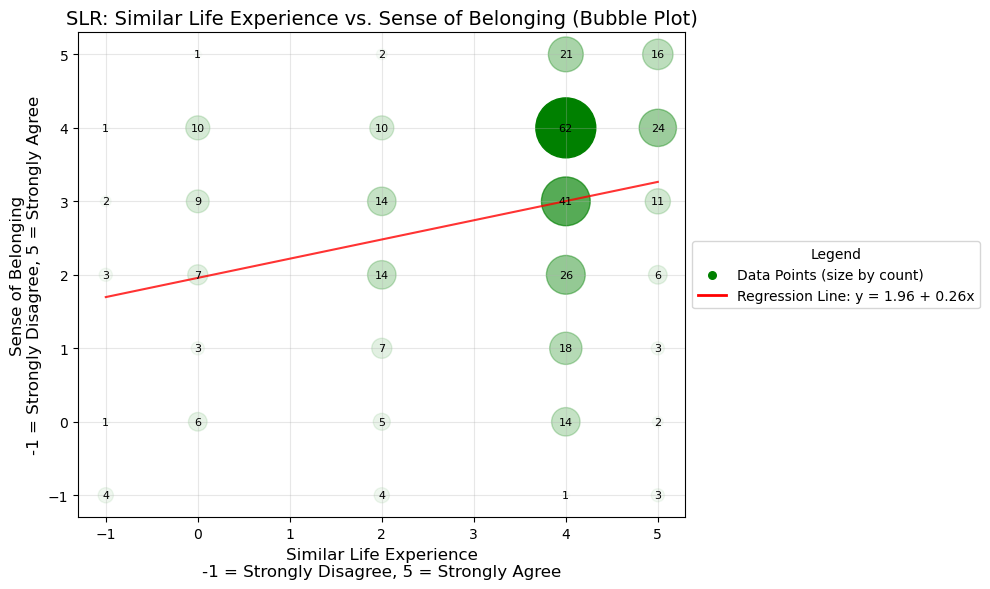

In [35]:
# Calculate counts for the bubble plot
bubble_data = (
    df_encoded_psych.groupby(
        [
            "PSYCH_relational_needs_satisfaction_scale_5pt_similar_life_experience",
            "PSYCH_ubc_state_social_connection_scale_sense_of_belonging",
        ]
    )
    .size()
    .reset_index(name="counts")
)




# Bubble plot with enhanced styling
plt.figure(figsize=(10, 6))

# Define bubble color gradient (e.g., green)
bubble_color = "green"

# Scatter plot with bubble size and alpha based on counts
bubbles = plt.scatter(
    bubble_data["PSYCH_relational_needs_satisfaction_scale_5pt_similar_life_experience"],
    bubble_data["PSYCH_ubc_state_social_connection_scale_sense_of_belonging"],
    s=bubble_data["counts"] * 30,  # Scale bubble size by count
    alpha=bubble_data["counts"] / bubble_data["counts"].max(),  # Transparency based on count
    label="Data Points (size by count)",
    color=bubble_color
)

# Add count labels to each bubble
for i, row in bubble_data.iterrows():
    plt.text(
        row["PSYCH_relational_needs_satisfaction_scale_5pt_similar_life_experience"],
        row["PSYCH_ubc_state_social_connection_scale_sense_of_belonging"],
        str(int(row["counts"])),
        ha="center",
        va="center",
        fontsize=8,
        color="black"
    )

# Regression line (calculated from model results)
x_vals_corrected = df_encoded_psych["PSYCH_relational_needs_satisfaction_scale_5pt_similar_life_experience"]
y_vals_corrected = 1.9584 + 0.2613 * x_vals_corrected  # Using the intercept and slope from the regression model
plt.plot(
    sorted(x_vals_corrected),
    sorted(y_vals_corrected),
    color="red",
    label="Regression Line: y = 1.96 + 0.26x",
    alpha=0.8
)

# Add titles and labels
plt.title("SLR: Similar Life Experience vs. Sense of Belonging (Bubble Plot)", fontsize=14)
plt.xlabel("Similar Life Experience\n-1 = Strongly Disagree, 5 = Strongly Agree", fontsize=12)
plt.ylabel("Sense of Belonging\n-1 = Strongly Disagree, 5 = Strongly Agree", fontsize=12)

# Adjust legend to be outside the plot and reduce the size of the bubble in the legend
legend_bubble = plt.scatter([], [], s=30, color=bubble_color, alpha=1)
plt.legend(
    [legend_bubble, plt.Line2D([0], [0], color="red", lw=2)],
    ["Data Points (size by count)", "Regression Line: y = 1.96 + 0.26x"],
    fontsize=10,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    title="Legend"
)

# Add grid and layout adjustments
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()




The bubble plot illustrates a positive association between having similar life experiences and a sense of belonging. Larger bubbles around "Agree" and "Strongly Agree" indicate that most respondents felt both a stronger sense of belonging and higher alignment with similar life experiences.

### 2. Second SLR
##### Sense of Belonging:
To investigate whether PSYCH_ubc_state_social_connection_scale_sense_of_belonging (independent) affects PSYCH_ubc_state_social_connection_scale_can_connect_with_others (dependent), we used a jittered scatter plot with a regression line. This visualization highlights the positive relationship between belonging and the ability to connect.

In [36]:
import statsmodels.api as sm

# Define the dependent and independent variables
X = df_encoded_psych["PSYCH_ubc_state_social_connection_scale_sense_of_belonging"]
y = df_encoded_psych["PSYCH_ubc_state_social_connection_scale_can_connect_with_others"]

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                                                   OLS Regression Results                                                  
Dep. Variable:     PSYCH_ubc_state_social_connection_scale_can_connect_with_others   R-squared:                       0.504
Model:                                                                         OLS   Adj. R-squared:                  0.502
Method:                                                              Least Squares   F-statistic:                     354.0
Date:                                                             Sun, 01 Dec 2024   Prob (F-statistic):           5.15e-55
Time:                                                                     05:55:07   Log-Likelihood:                -512.67
No. Observations:                                                              351   AIC:                             1029.
Df Residuals:                                                                  349   BIC:                             1037.
Df Model

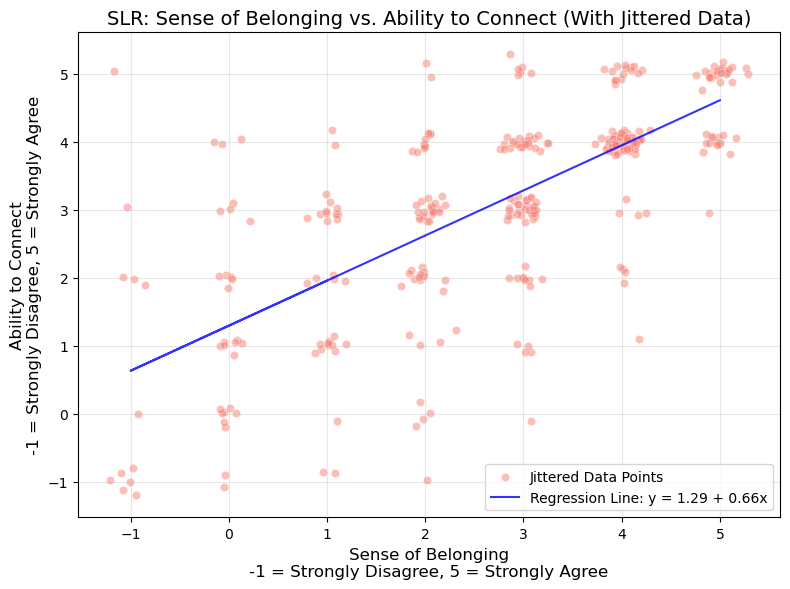

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Adding jitter to observed data points
jitter_x = df_encoded_psych["PSYCH_ubc_state_social_connection_scale_sense_of_belonging"] + np.random.normal(0, 0.1, size=df_encoded_psych.shape[0])
jitter_y = df_encoded_psych["PSYCH_ubc_state_social_connection_scale_can_connect_with_others"] + np.random.normal(0, 0.1, size=df_encoded_psych.shape[0])

# Scatter plot with jittered regression line and data points
plt.figure(figsize=(8, 6))

# Scatter plot with jittered data points in salmon pink
sns.scatterplot(
    x=jitter_x,
    y=jitter_y,
    alpha=0.5,
    label="Jittered Data Points",
    color="salmon"
)

# Regression line (calculated from model results)
x_vals = df_encoded_psych["PSYCH_ubc_state_social_connection_scale_sense_of_belonging"]
y_vals = 1.2947 + 0.6632 * x_vals  # Using the intercept and slope from the regression model
plt.plot(
    x_vals, y_vals, color="blue", label="Regression Line: y = 1.29 + 0.66x", alpha=0.8
)

# Add titles and labels
plt.title("SLR: Sense of Belonging vs. Ability to Connect (With Jittered Data)", fontsize=14)
plt.xlabel("Sense of Belonging\n-1 = Strongly Disagree, 5 = Strongly Agree", fontsize=12)
plt.ylabel("Ability to Connect\n-1 = Strongly Disagree, 5 = Strongly Agree", fontsize=12)

# Add legend and grid
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


This graph analyzes the relationship between a sense of belonging and the ability to connect with others. The positive slope of the regression line (y=1.29+0.66x) indicates that as the sense of belonging increases, individuals report greater ability to connect with others. This supports the hypothesis that psychological perceptions of belonging significantly impact social connection.

### Ability to Connect with Others (MLR):
For the final analysis, we examined the combined effects of PSYCH_relational_needs_satisfaction_scale_5pt_similar_life_experience, PSYCH_ubc_state_social_connection_scale_sense_of_belonging, and PSYCH_ubc_state_social_connection_scale_see_people_friendly_approachable (independent variables) on PSYCH_ubc_state_social_connection_scale_can_connect_with_others (dependent variable). Additionally, we included an interaction term between sense of belonging and shared life experiences. A jittered scatter plot was overlaid with regression lines to visualize the combined predictors, including the added variable for perceived friendliness and approachability.

In [38]:
import statsmodels.api as sm

# Define dependent and independent variables
y_mlr = df_encoded_psych["PSYCH_ubc_state_social_connection_scale_can_connect_with_others"]
X_mlr = df_encoded_psych[
    [
        "PSYCH_relational_needs_satisfaction_scale_5pt_similar_life_experience",
        "PSYCH_ubc_state_social_connection_scale_sense_of_belonging",
        "PSYCH_ubc_state_social_connection_scale_see_people_friendly_approachable"
    ]
]

# Add a constant for the intercept
X_mlr = sm.add_constant(X_mlr)

# Fit the multiple linear regression model
mlr_model = sm.OLS(y_mlr, X_mlr).fit()

# Print the summary
print(mlr_model.summary())

                                                   OLS Regression Results                                                  
Dep. Variable:     PSYCH_ubc_state_social_connection_scale_can_connect_with_others   R-squared:                       0.593
Model:                                                                         OLS   Adj. R-squared:                  0.589
Method:                                                              Least Squares   F-statistic:                     168.4
Date:                                                             Sun, 01 Dec 2024   Prob (F-statistic):           2.26e-67
Time:                                                                     05:55:08   Log-Likelihood:                -477.86
No. Observations:                                                              351   AIC:                             963.7
Df Residuals:                                                                  347   BIC:                             979.2
Df Model

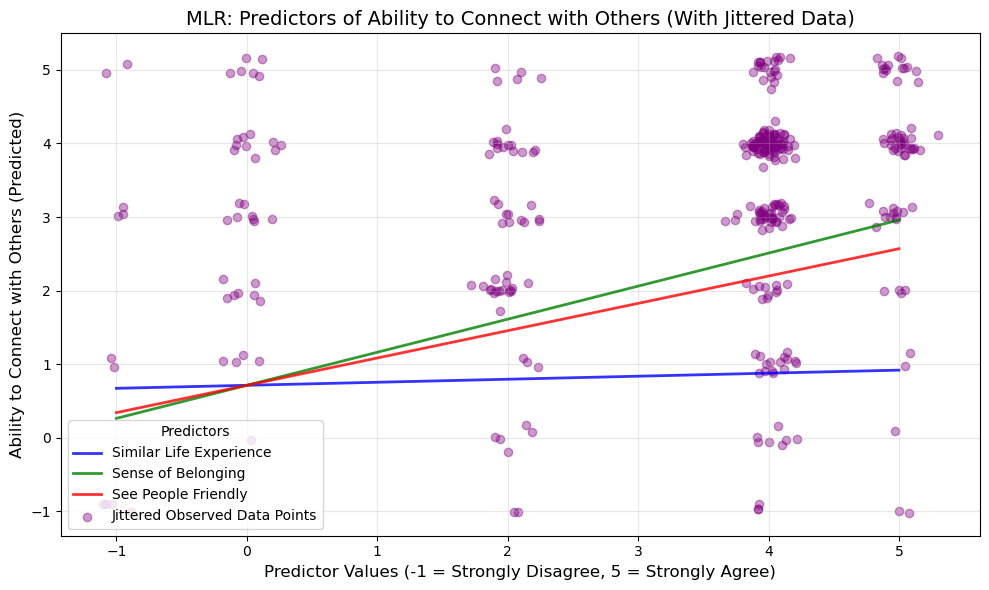

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Extract coefficients from regression metrics
coef = {
    "const": 0.7133,
    "PSYCH_relational_needs_satisfaction_scale_5pt_similar_life_experience": 0.0412,
    "PSYCH_ubc_state_social_connection_scale_sense_of_belonging": 0.4492,
    "PSYCH_ubc_state_social_connection_scale_see_people_friendly_approachable": 0.3712,
}

# Generate x-values for plotting predictions
x_vals_similar = df_encoded_psych["PSYCH_relational_needs_satisfaction_scale_5pt_similar_life_experience"]
x_vals_belonging = df_encoded_psych["PSYCH_ubc_state_social_connection_scale_sense_of_belonging"]
x_vals_friendly = df_encoded_psych["PSYCH_ubc_state_social_connection_scale_see_people_friendly_approachable"]

# Calculate predicted y-values for each predictor
y_vals_similar = coef["const"] + coef["PSYCH_relational_needs_satisfaction_scale_5pt_similar_life_experience"] * x_vals_similar
y_vals_belonging = coef["const"] + coef["PSYCH_ubc_state_social_connection_scale_sense_of_belonging"] * x_vals_belonging
y_vals_friendly = coef["const"] + coef["PSYCH_ubc_state_social_connection_scale_see_people_friendly_approachable"] * x_vals_friendly

# Adding jitter to observed data points
jitter_x = (
    df_encoded_psych["PSYCH_relational_needs_satisfaction_scale_5pt_similar_life_experience"]
    + np.random.normal(0, 0.1, size=df_encoded_psych.shape[0])
)
jitter_y = (
    df_encoded_psych["PSYCH_ubc_state_social_connection_scale_can_connect_with_others"]
    + np.random.normal(0, 0.1, size=df_encoded_psych.shape[0])
)

# Plot MLR with jittered data points
plt.figure(figsize=(10, 6))

# Plot lines for individual predictors
plt.plot(
    sorted(x_vals_similar),
    sorted(y_vals_similar),
    label="Similar Life Experience",
    color="blue",
    alpha=0.8,
    linewidth=2,
)
plt.plot(
    sorted(x_vals_belonging),
    sorted(y_vals_belonging),
    label="Sense of Belonging",
    color="green",
    alpha=0.8,
    linewidth=2,
)
plt.plot(
    sorted(x_vals_friendly),
    sorted(y_vals_friendly),
    label="See People Friendly",
    color="red",
    alpha=0.8,
    linewidth=2,
)

# Overlay jittered observed data points
plt.scatter(
    jitter_x,
    jitter_y,
    color="purple",
    alpha=0.4,
    label="Jittered Observed Data Points",
)

# Add titles, labels, and legend
plt.title("MLR: Predictors of Ability to Connect with Others (With Jittered Data)", fontsize=14)
plt.xlabel("Predictor Values (-1 = Strongly Disagree, 5 = Strongly Agree)", fontsize=12)
plt.ylabel("Ability to Connect with Others (Predicted)", fontsize=12)
plt.legend(title="Predictors", fontsize=10, loc="best")
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()




This graph demonstrates the multiple linear regression (MLR) analysis of predictors influencing the ability to connect with others. The green line (sense of belonging) and red line (perceiving others as friendly and approachable) show significant positive slopes, indicating a strong relationship with the dependent variable. In contrast, the blue line (similar life experience) remains almost flat, suggesting a minimal effect. These results emphasize that belonging and approachability play a more prominent role in fostering connections than shared experiences.

# Social Barriers

This analysis focused on understanding the predictors of the statement, *"I don't have people to hang out with"* (`CONNECTION_social_barriers_no_people`), based on social barriers. The independent variables included *"I don’t know where to meet people"* (`CONNECTION_social_barriers_dont_know_where`), *"There’s nothing to do"* (`CONNECTION_social_barriers_nothing_to_do`), and their interaction (`Interaction`). A multiple linear regression (MLR) model was used to predict the dependent variable. The plot visualizes the predicted effects of each independent variable as individual lines, while the dashed line represents the interaction effect, highlighting how the combined presence of barriers influences the response.

In [40]:
#Reset Dataframe

import pandas as pd

# Load dataset
csv_url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
df = pd.read_csv(csv_url, low_memory=False)
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [41]:
# Variables of interest
connection_vars = [
    "CONNECTION_social_barriers_no_people",
    "CONNECTION_social_barriers_dont_know_where",
    "CONNECTION_social_barriers_nothing_to_do"
]

# Display unique responses for each variable
unique_responses = {var: df[var].unique() for var in connection_vars}

print("Unique Responses for Each Variable:")
for var, responses in unique_responses.items():
    print(f"{var}: {responses}")


Unique Responses for Each Variable:
CONNECTION_social_barriers_no_people: [nan 'Not Selected' 'I don’t have people to hang out with'
 'Presented but no response' "I don't have people to hang out with"]
CONNECTION_social_barriers_dont_know_where: [nan 'Not Selected' 'I don’t know where to meet people'
 'Presented but no response']
CONNECTION_social_barriers_nothing_to_do: [nan 'Not Selected' 'Presented but no response' "There's nothing to do"
 'There’s nothing to do']


In [42]:
# Standardize responses for consistency
df_cleaned = df.copy()
df_cleaned["CONNECTION_social_barriers_no_people"] = df_cleaned["CONNECTION_social_barriers_no_people"].replace(
    {"I don’t have people to hang out with": "I don't have people to hang out with"}
)
df_cleaned["CONNECTION_social_barriers_nothing_to_do"] = df_cleaned["CONNECTION_social_barriers_nothing_to_do"].replace(
    {"There’s nothing to do": "There's nothing to do"}
)

# Drop NaN and "Presented but no response"
df_cleaned = df_cleaned.dropna(subset=connection_vars)
df_cleaned = df_cleaned[
    ~df_cleaned["CONNECTION_social_barriers_no_people"].isin(["Presented but no response"])
]
df_cleaned = df_cleaned[
    ~df_cleaned["CONNECTION_social_barriers_dont_know_where"].isin(["Presented but no response"])
]
df_cleaned = df_cleaned[
    ~df_cleaned["CONNECTION_social_barriers_nothing_to_do"].isin(["Presented but no response"])
]

# Encode responses (binary encoding: 1 = selected, 0 = not selected)
binary_mapping = {
    "Not Selected": 0,
    "I don't have people to hang out with": 1,
    "I don’t know where to meet people": 1,
    "There's nothing to do": 1
}

for var in connection_vars:
    df_cleaned[var] = df_cleaned[var].map(binary_mapping)

# Display the cleaned dataset
print(f"Total respondents after cleaning: {df_cleaned.shape[0]}")
df_cleaned.head()


Total respondents after cleaning: 589


,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,GEO_residence_canada,GEO_province,DEMO_age,DEMO_gender,DEMO_identity_vetrans,DEMO_identity_indigenous,DEMO_identity_lgbtq,...,PSYCH_body_self_image_questionnaire_height_dissatisfaction_score,PSYCH_body_self_image_questionnaire_fatness_evaluation_score,PSYCH_body_self_image_questionnaire_negative_affect_score,PSYCH_body_self_image_questionnaire_social_dependence_score,PSYCH_big_five_inventory_agreeable_score,PSYCH_big_five_inventory_conscientious_score,PSYCH_big_five_inventory_extraverted_score,PSYCH_big_five_inventory_neurotic_score,PSYCH_big_five_inventory_open_score,REMOVE_case
5,cscs_00007,1,Yes,Yes,Ontario,55.0,Woman,NaN,NaN,Not Selected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
7,cscs_00009,1,Yes,Yes,Ontario,52.0,Woman,NaN,NaN,Not Selected,...,15.0,15.0,15.0,11.0,NaN,NaN,NaN,NaN,NaN,No
57,cscs_00061,1,Yes,Yes,Ontario,28.0,Woman,NaN,NaN,"Sexual or gender minorities (e.g., LGBTQ2+)",...,9.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,No
62,cscs_00066,1,Yes,Yes,British Columbia,55.0,Woman,NaN,NaN,Not Selected,...,5.0,15.0,11.0,10.0,NaN,NaN,NaN,NaN,NaN,No
68,cscs_00072,1,Yes,Yes,Alberta,63.0,Woman,NaN,NaN,Not Selected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [43]:
import statsmodels.api as sm

# Copy the cleaned dataframe for encoding
df_encoded_connection = df_cleaned.copy()

# Create the interaction term
df_encoded_connection['Interaction'] = (
    df_encoded_connection['CONNECTION_social_barriers_dont_know_where'] *
    df_encoded_connection['CONNECTION_social_barriers_nothing_to_do']
)

# Define independent variables and add a constant
X = df_encoded_connection[[
    'CONNECTION_social_barriers_dont_know_where',
    'CONNECTION_social_barriers_nothing_to_do',
    'Interaction'
]]
X = sm.add_constant(X)

# Define the dependent variable
y = df_encoded_connection['CONNECTION_social_barriers_no_people']

# Run the regression model
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())




                                     OLS Regression Results                                     
Dep. Variable:     CONNECTION_social_barriers_no_people   R-squared:                       0.161
Model:                                              OLS   Adj. R-squared:                  0.157
Method:                                   Least Squares   F-statistic:                     37.50
Date:                                  Sun, 01 Dec 2024   Prob (F-statistic):           3.54e-22
Time:                                          05:55:11   Log-Likelihood:                -184.53
No. Observations:                                   589   AIC:                             377.1
Df Residuals:                                       585   BIC:                             394.6
Df Model:                                             3                                         
Covariance Type:                              nonrobust                                         
                              

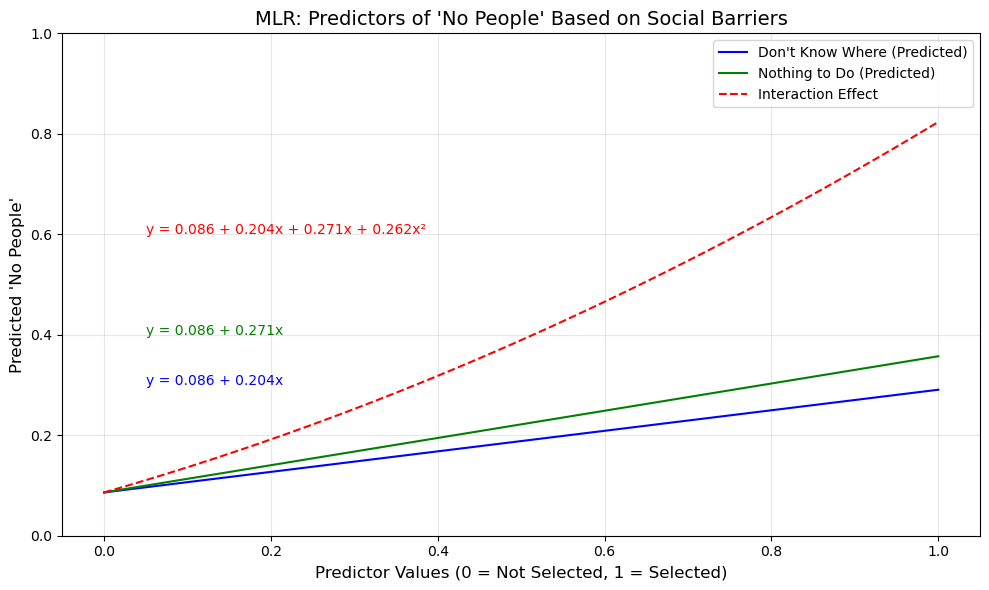

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Predictor values for plotting
x_values = np.linspace(0, 1, 100)

# Lines for predictors and interaction
predicted_no_people_dont_know_where = 0.0862 + 0.2044 * x_values
predicted_no_people_nothing_to_do = 0.0862 + 0.2710 * x_values
interaction_effect = 0.0862 + 0.2044 * x_values + 0.2710 * x_values + 0.2620 * (x_values * x_values)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the lines
plt.plot(x_values, predicted_no_people_dont_know_where, color="blue", label="Don't Know Where (Predicted)")
plt.plot(x_values, predicted_no_people_nothing_to_do, color="green", label="Nothing to Do (Predicted)")
plt.plot(x_values, interaction_effect, color="red", linestyle="dashed", label="Interaction Effect")

# Add equations as text
plt.text(0.05, 0.3, "y = 0.086 + 0.204x", color="blue", fontsize=10)
plt.text(0.05, 0.4, "y = 0.086 + 0.271x", color="green", fontsize=10)
plt.text(0.05, 0.6, "y = 0.086 + 0.204x + 0.271x + 0.262x²", color="red", fontsize=10)

# Add titles and labels
plt.title("MLR: Predictors of 'No People' Based on Social Barriers", fontsize=14)
plt.xlabel("Predictor Values (0 = Not Selected, 1 = Selected)", fontsize=12)
plt.ylabel("Predicted 'No People'", fontsize=12)
plt.ylim(0, 1)  # Extend y-axis to 1

# Add legend and grid
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


This graph visualizes the multiple linear regression (MLR) results predicting "No People" based on social barriers, where the predictors are binary (0 = Not Selected, 1 = Selected). The blue line represents "Don't Know Where," the green line "Nothing to Do," and the red dashed line illustrates the interaction effect between these variables. The binary nature of the predictors highlights clear distinctions in how these social barriers contribute to respondents feeling like they lack people to hang out with.